# CARTERAS EFICIENTES

Recordad que vimos que el resultado de generar carteras aleatorias con cuatro activos era una nube de puntos como se ve en la figura inferior. 

- La pregunta es ¿cuáles son las **carteras eficientes**?

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')

In [12]:
#leo los datos y calculo retornos
data = pd.read_csv("../data/data.csv",index_col=0, parse_dates=True)
retornos = np.log(data).diff().dropna()

In [ ]:
#defino número de activos y carteras
num_act = retornos.shape[1]
num_carteras = 2000

In [88]:
#genero pesos aleatorios
rng= np.random.default_rng(seed=123)
pesos = rng.random((num_carteras, num_act))
pesos /= np.sum(pesos, axis=1)[:, None] #normalizo

In [89]:
#calculo retornos y volatilidades
ret_carteras = retornos @ pesos.T

volatilidades = np.sqrt(np.var(ret_carteras)*252)
rentabilidades = 252*np.mean(ret_carteras, axis=0)

/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


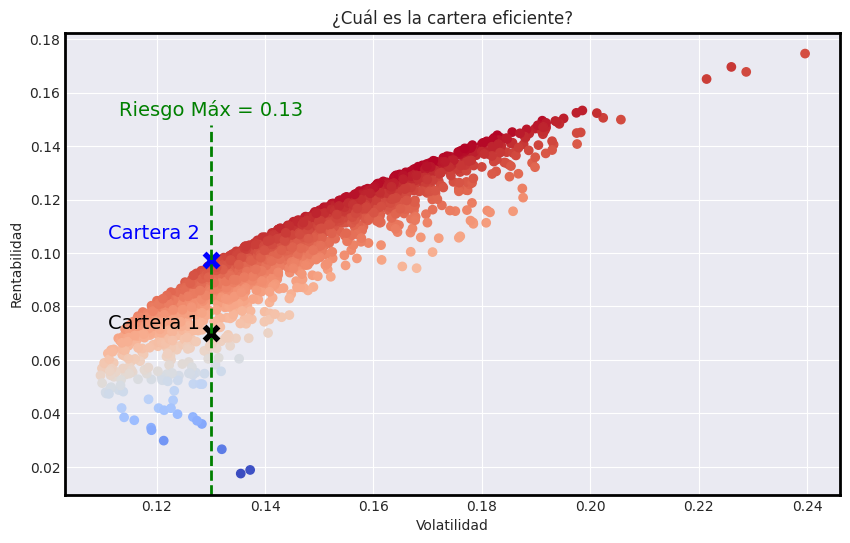

In [90]:
#grafico

plt.figure(figsize=(10, 6))
plt.scatter(volatilidades, rentabilidades, c=rentabilidades / volatilidades, marker='o', cmap='coolwarm')
plt.xlabel('Volatilidad')
plt.ylabel('Rentabilidad')
plt.title('¿Cuál es la cartera eficiente?')
#plt.colorbar(label='Sharpe ratio')

# Añadir un segmento vertical
plt.axvline(x=0.13, ymin=0, ymax=0.8, color='green', linestyle='--', linewidth=2)

# Añadir etiqueta al segmento vertical
plt.text(0.13, 0.15, 'Riesgo Máx = 0.13', fontsize=14, verticalalignment='bottom', horizontalalignment='center', color='green')


# Añadir puntos específicos
plt.scatter(0.13, 0.07, color='black', marker='x', s=100, linewidths=4)  # Punto para la cartera 1
plt.scatter(0.13, 0.0975, color='blue', marker='x', s=100, linewidths=4) # Punto para la cartera 2

# Añadir etiquetas para los puntos
plt.text(0.128, 0.07, 'Cartera 1', fontsize=14, verticalalignment='bottom', horizontalalignment='right', color = 'black')
plt.text(0.128, 0.104, 'Cartera 2', fontsize=14, verticalalignment='bottom', horizontalalignment='right', color='blue')

# Configurar el borde de la figura
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)


plt.show()


También podemos hacerlo partiendo de  un rendimiento mínimo

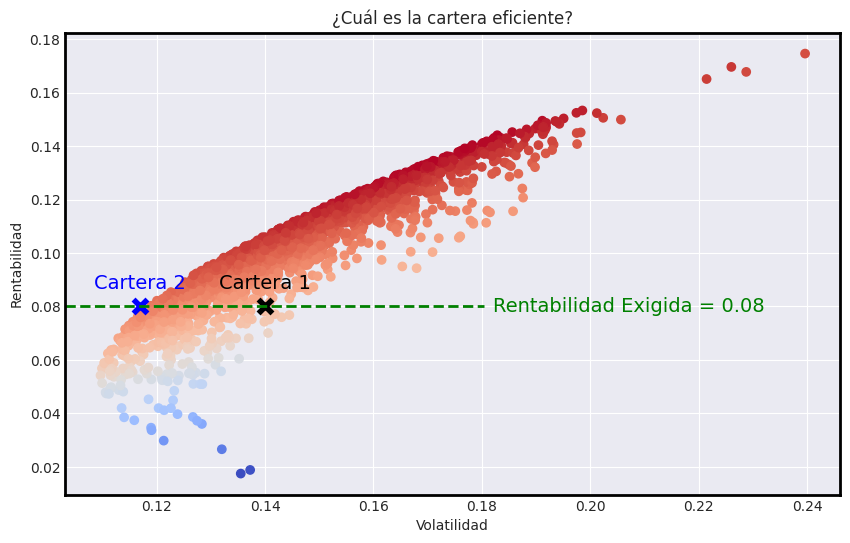

In [ ]:
#grafico

plt.figure(figsize=(10, 6))
plt.scatter(volatilidades, rentabilidades, c=rentabilidades / volatilidades, marker='o', cmap='coolwarm')
plt.xlabel('Volatilidad')
plt.ylabel('Rentabilidad')
plt.title('¿Cuál es la cartera eficiente?')
#plt.colorbar(label='Sharpe ratio')

# Añadir un segmento vertical
plt.axhline(xmin=0, xmax=0.54, y=0.08, color='green', linestyle='--', linewidth=2)

# Añadir etiqueta al segmento vertical
plt.text(0.182, 0.08, 'Rentabilidad Exigida = 0.08', fontsize=14, verticalalignment='center', horizontalalignment='left', color='green')


# Añadir puntos específicos
plt.scatter(0.14, 0.08, color='black', marker='x', s=100, linewidths=4)  # Punto para la cartera 1
plt.scatter(0.117, 0.08, color='blue', marker='x', s=100, linewidths=4) # Punto para la cartera 2

# Añadir etiquetas para los puntos
plt.text(0.14, 0.085, 'Cartera 1', fontsize=14, verticalalignment='bottom', horizontalalignment='center', color = 'black')
plt.text(0.117, 0.085, 'Cartera 2', fontsize=14, verticalalignment='bottom', horizontalalignment='center', color='blue')

# Configurar el borde de la figura
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)


plt.show()

## La función de utilidad del inversor

Para poder definir las carteras eficientes tenemos que tener en cuenta la **función de utilidad del inversor**.

La función de utilidad:

- Define cómo un inversor valora riesgo y retorno.

- Cuantifica satisfacción o felicidad de una inversión.

- Considera aversión al riesgo del inversor.

- Inversores aversos al riesgo prefieren inversiones seguras con rendimientos menores.

- Inversores con baja aversión al riesgo eligen inversiones arriesgadas con posibles mayores retornos.

Una cartera puede ser óptima para un inversor con baja aversión al riesgo pero subóptima para otro inversor con menor aversión al riesgo.

Para resolver este problema creamos una función de utidad $U(\tilde{w})$.

$\qquad$ $\tilde{w} = \tilde{w}_0 (1+r_p(w))$

$\qquad$ $U(\tilde{w}) = U(\tilde{w}_0(1+r_p(w)))$

donde:

- $\tilde{w}$ es la riqueza al finalizar el periodo, 
  
- $\tilde{w}_0$ es la riqueza inicial, 
  
- $r_p$ es la rentabilidad de la cartera, la cual es aleatoria.

Por tanto, deberemos incorporar la aversión al riesgo del inversor.

En este contexto podremos hablar de maximizar la utilidad esperada:

$\qquad$ $\underset{w}{max} f(w) =\mathbb{E} \left[ U(\tilde{w}_0(1+r_p(w)))\right]$ $\qquad$ donde:  $\  r_p(w) = \sum_i{w_ir_i}$

$\qquad$ $\underset{w}{max} f(w) =\mathbb{E} \left[ U(\tilde{w}_0\left(1+\sum_i{w_ir_i}\right))\right]$

Para optimizar, calculamos las FOC:

$\qquad$ $\Large \frac{\partial f(w)}{w_i}$  $=U' \left(\tilde{w}_0+\sum_i{w_ir_i}\right)r_i=0$


$\qquad$ $\Large \frac{\partial^2 f(w)}{w_i^2}$ $=U'' \left(\tilde{w}_0+\sum_i{w_ir_i}\right)r^2_i<0$

La teoría económica indica que

- $U'(\tilde{w})$ debe ser positivo ya que el inversor prefiere más rentabilidad.

- $U''(\tilde{w})$ debe ser negativa para reflejar la aversión al riesgo.

**Markowitz**, premio Nóbel de Economía, es el autor de la Teoría Moderna de Carteras como un problema de **optimización de media-varianza** a la que se llega haciendo una de las siguientes hipótesis:

- una función de utilidad cuadrática

- rendimientos que se comportan como una función distribución normal tipificadas por una media y varianza.

Markowitz, propone maximizar la siguiente función de utilidad:

$$\qquad \underset{w}{\max} f(w)=w^TR-\lambda w^T\Sigma w \tag{1}$$

donde:

- $R$ es la matriz de los retornos esperados

- $ \lambda$ es el coeficiente de aversión al riesgo (o tolerancia al riesgo)

- $ \Sigma$ es la matriz de varianzas-covarianzas


Dos inversores pueden tener distinta tolerancia al riesgo y por lo tanto tener distintas carteras eficientes.




SI calculamos FOC:

$$\frac{\partial f(w)}{\partial w}=R-\lambda \Sigma w=0 \tag{2}$$
<br>

Dado que la función $f(w)$ es cóncava, la condición de primer orden define un único máximo. Por tanto:

$$w=\frac{1}{2\lambda}\Sigma^{-1} \tag{3}R$$

<br>


**NOTA** más adelante veremos como el componente $\Sigma^{-1}$ (inversa de la matriz de covarianzas) supone un reto a la hora de optimizar carteras

## MEDIA-VARIANZA: Frontera Eficiente

Con todo esto, podemos plantear el problema de calcular la frontera eficiente en un **problema de optimización**.

En nuestro caso, podemos replantear la ecuación (1) como:

$\qquad \underset{m}{max} (-w^T\Sigma w)$

$\qquad$ s.t. $\ w^T R = \hat{R}$

donde $\hat{R}$ es el rendimiento esperado por el inversor.

OJO: AL maximizar la varianza con signo menos, es lo mismo que minimizar la varianza

Utilizando Lagrange para resolver el problema:

$$\mathcal{L}(w,\upsilon)=\left(-w^T\Sigma w\right)+\lambda\left( w^TR-\hat{R}\right) \tag{4}$$

La condición de primer orden del proceso de optimización será:

$$\left\{
\begin{align}
\frac{\partial L}{\partial w}=-2\Sigma w+ \lambda R =0 \qquad\\

\frac{\partial L}{\partial \lambda} =w^TR-\hat{R} =0 \qquad
\end{align}
\right. \tag{5}$$


Resolvemos el sistema de ecuaciones:

$$\begin{align}
\lambda R&=2\Sigma w \tag{6}\\
w&=\frac{\lambda}{2} \Sigma^{-1} R \tag{7}
\end{align}$$


Utilizamos la ecuación (5)(2) para despejar $\lambda$

$$ w^TR = \hat{R} \\
\left(\lambda \Sigma^{-1} R  \right)^TR = 2\hat{R}  \\
\boxed{\lambda =\frac{2\hat{R}}{R^T\Sigma^{-1} R}}\tag{8}$$


En realidad, nosostros vamos a calcular las carteras eficientes mediante **problemas de optimizacón** y vamos a resolverlos numéricamente.

En el siguiente tema, vamos a estudiar una introducción a la optimización y a las librerías que existen en Python para resolver este tipo de problemas.

Una vez aprendidos los mecanismos de resolución de problemas de optimización que hay en Python, volveremos a calcular más ejemplos de carteras eficientes.

---

# NOTAS ADICIONALES

### CARTERA EFICIENTE CON MÁS DE UNA RESTRICCIÓN:

Añadimos una nueva restricción que es que tenemos que invertir el dinero que tenemos (ni más ni menos):

- La suma de los pesos de los activos tiene que ser igual a 1

El nuevo problema de optimización lo podemos escribir como:

$\qquad \underset{w}{min} \left(w^T\Sigma w\right)$

$\qquad s.t. \quad w^TR=\hat{R}$

$\qquad \qquad w^T1=1$


Volvemos a utilizar el Langranjiano

$\qquad \mathcal{L}(w,\upsilon)=\left(-w^T\Sigma w\right)+\lambda_1\left( w^TR-\hat{R}\right)+\lambda_2\left( w^T1-1 \right)$

Desarrollamos la condición de primer orden:

$\qquad \frac{\partial L}{\partial w}=-2\Sigma w+ \lambda_1 R+\lambda_2 1=0$

$\qquad \frac{\partial L}{\partial \lambda_1} =w^TR-\hat{R}=0$

$\qquad \frac{\partial L}{\partial \lambda_2} =w^T1-1=0$


La resolución del sistema de ecuaciones nos lleva a:

$\qquad w = \frac{1}{d}\left[c\Sigma^{-1}R-a\Sigma^{-1} 1 \right]\hat{R}+\frac{1}{d}\left[b\Sigma^{-1} 1-a\Sigma^{-1} R \right]$

$\qquad a = 1^T\Sigma^{-1}R$

$\qquad b = R^T\Sigma^{-1}R$ 

$\qquad c = 1^T\Sigma^{-1}1$

$\qquad a = bc-a^2$

### Cartera de mínima varianza

La cartera de mínima varianza se obtiene solucionando el siguiente problema de optimización:
$$\begin{gather}
\underset{w}{min} \left(w^T\Sigma w\right) \tag{24}\\
s.t. w^T1=1 \nonumber
\end{gather}$$

Estimamos el Lagranjiano y aplicamos la condición de primer orden

$$\begin{align}
\mathcal{L}(w,\lambda)&=\left(-w^T\Sigma w\right)-\lambda\left( w^T1=1\right)  \tag{24} \\
\frac{\partial L}{\partial w}&=2\Sigma w- \lambda 1=0 \tag{25} \\
\frac{\partial L}{\partial \lambda} &=w^T1-1=0 \tag{26}
\end{align} $$

El sistema de ecuaciones nos lleva a la siguiente solución:
$$w=\frac{\Sigma^{-1}1}{1^T\Sigma^{-1}1}$$